In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("Digital Personas Survey: AI Influencers vs. Human Content Creators.csv")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 56 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                           --------------  -----  
 0   Timestamp                                                                                                                        131 non-null    object 
 1   Total score                                                                                                                      131 non-null    object 
 2   Age                                                                                                                              131 non-null    object 
 3   Age [Score]                                                                                         

,Timestamp,Total score,Age,Age [Score],Age [Feedback],Gender,Gender [Score],Gender [Feedback],Highest Education Level (Obtained or Pursuing),Highest Education Level (Obtained or Pursuing) [Score],...,"In comparison to human influencers, AI influencers should be paid [Feedback]",For which of the following categories would you trust recommendations from an AI influencer? (select all that apply),For which of the following categories would you trust recommendations from an AI influencer? (select all that apply) [Score],For which of the following categories would you trust recommendations from an AI influencer? (select all that apply) [Feedback],Do you believe AI influencers impact beauty standards and self-image perceptions?,Do you believe AI influencers impact beauty standards and self-image perceptions? [Score],Do you believe AI influencers impact beauty standards and self-image perceptions? [Feedback],Should content created by AI influencers be clearly labeled as AI-generated?,Should content created by AI influencers be clearly labeled as AI-generated? [Score],Should content created by AI influencers be clearly labeled as AI-generated? [Feedback]
0,2025/03/03 6:57:55 PM MST,6.00 / 6,18-25,-- / 0,NaN,Female,-- / 0,NaN,Master's,-- / 0,...,NaN,Fashion & Beauty Products;Technology Products ...,-- / 0,NaN,Yes,-- / 0,NaN,Yes,-- / 0,NaN
1,2025/03/03 7:00:10 PM MST,6.00 / 6,18-25,-- / 0,NaN,Female,-- / 0,NaN,Master's,-- / 0,...,NaN,Fashion & Beauty Products;None of the above,-- / 0,NaN,Yes,-- / 0,NaN,Yes,-- / 0,NaN
2,2025/03/04 8:31:16 AM MST,4.00 / 6,50,-- / 0,NaN,Prefer not to say,-- / 0,NaN,High school or lower,-- / 0,...,NaN,None of the above,-- / 0,NaN,Yes,-- / 0,NaN,I don't care,-- / 0,NaN
3,2025/03/05 3:48:41 PM MST,3.00 / 6,18-25,-- / 0,NaN,Female,-- / 0,NaN,Master's,-- / 0,...,NaN,Technology Products & Services;Travel;Health &...,-- / 0,NaN,Yes,-- / 0,NaN,Yes,-- / 0,NaN
4,2025/03/05 3:49:55 PM MST,4.00 / 6,18-25,-- / 0,NaN,Male,-- / 0,NaN,Master's,-- / 0,...,NaN,None of the above,-- / 0,NaN,No,-- / 0,NaN,Yes,-- / 0,NaN


/var/folders/6t/0n276fjj38dg0xkh39crz9cc0000gn/T/ipykernel_77085/751492445.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Age"], order=df["Age"].value_counts().index, palette="viridis")


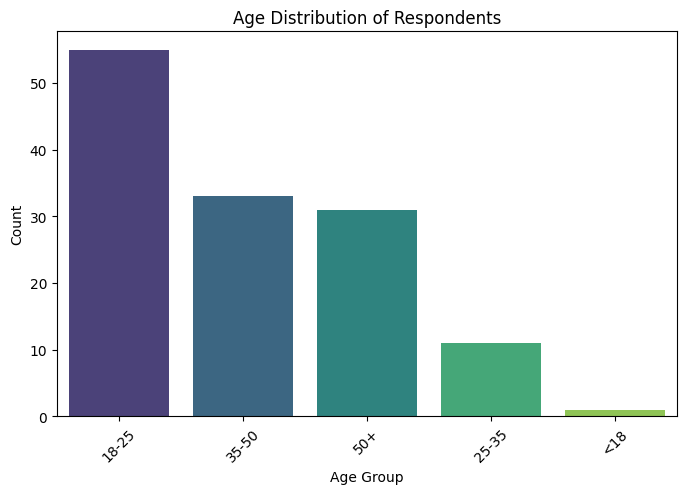

In [4]:
import seaborn as sns

# Plot age distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Age"], order=df["Age"].value_counts().index, palette="viridis")
plt.title("Age Distribution of Respondents")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [9]:
print(df.columns)

Index(['Timestamp', 'Total score', 'Age', 'Age [Score]', 'Age [Feedback]',
       'Gender', 'Gender [Score]', 'Gender [Feedback]',
       'Highest Education Level (Obtained or Pursuing)',
       'Highest Education Level (Obtained or Pursuing) [Score]',
       'Highest Education Level (Obtained or Pursuing) [Feedback]',
       'Where are you located?', 'Where are you located? [Score]',
       'Where are you located? [Feedback]',
       'How long do you spend on Instagram in a day?',
       'How long do you spend on Instagram in a day? [Score]',
       'How long do you spend on Instagram in a day? [Feedback]',
       'Have you heard of AI influencers?',
       'Have you heard of AI influencers? [Score]',
       'Have you heard of AI influencers? [Feedback]',
       'Have you ever followed or interacted with an AI influencer?',
       'Have you ever followed or interacted with an AI influencer? [Score]',
       'Have you ever followed or interacted with an AI influencer? [Feedback]',
    

Percentage of people who got Q1 correct: 46.56%


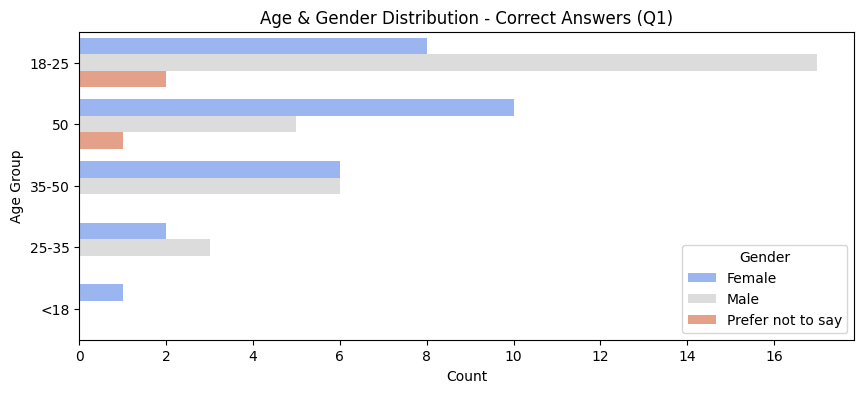

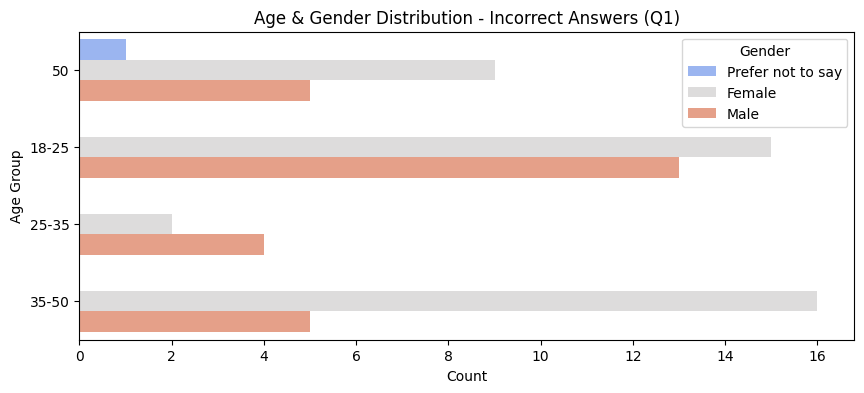

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


def analyze_question(df, question_col_prefix, age_col="Age", gender_col="Gender"):
    """
    Analyzes a specific question by visualizing the percentage of correct responses,
    and demographic distributions for those who got it right vs. wrong.

    Parameters:
    df (DataFrame): The dataset.
    question_col_prefix (str): Prefix of the question column (e.g., "Q1").
    age_col (str): Column name representing age.
    gender_col (str): Column name representing gender.
    """

    question_index = df.columns.get_loc(question_col_prefix)
    score_col = df.columns[question_index + 1]  # The next 

    # Extract correct and incorrect responses
    correct_responses = df[df[score_col] == "1.00 / 1"]
    incorrect_responses = df[df[score_col] != "1.00 / 1"]

    # Calculate percentage of correct responses
    total_responses = len(df)
    correct_percentage = (len(correct_responses) / total_responses) * 100

    # Print the percentage of people who got it right
    print(f"Percentage of people who got {question_col_prefix} correct: {correct_percentage:.2f}%")

    # Demographics of correct responses
    plt.figure(figsize=(10, 4))
    sns.countplot(y=correct_responses[age_col], hue=correct_responses[gender_col], palette="coolwarm")
    plt.title(f"Age & Gender Distribution - Correct Answers ({question_col_prefix})")
    plt.xlabel("Count")
    plt.ylabel("Age Group")
    plt.legend(title="Gender")
    plt.show()

    # Demographics of incorrect responses
    plt.figure(figsize=(10, 4))
    sns.countplot(y=incorrect_responses[age_col], hue=incorrect_responses[gender_col], palette="coolwarm")
    plt.title(f"Age & Gender Distribution - Incorrect Answers ({question_col_prefix})")
    plt.xlabel("Count")
    plt.ylabel("Age Group")
    plt.legend(title="Gender")
    plt.show()

    return correct_responses[[age_col, gender_col]], incorrect_responses[[age_col, gender_col]]

# Example usage (replace "Q1" with the actual prefix from your dataset)
correct_demo, incorrect_demo = analyze_question(df, "Q1")


Percentage of people who heard of AI influencers and got Q1 correct: 50.51%
Percentage of people who haven't heard of AI influencers and got Q1 correct: 34.38%
Percentage of people who heard of AI influencers and got Q2 correct: 41.41%
Percentage of people who haven't heard of AI influencers and got Q2 correct: 43.75%
Percentage of people who heard of AI influencers and got Q3 correct: 59.60%
Percentage of people who haven't heard of AI influencers and got Q3 correct: 46.88%
Percentage of people who heard of AI influencers and got Q4 correct: 69.70%
Percentage of people who haven't heard of AI influencers and got Q4 correct: 53.12%
Percentage of people who heard of AI influencers and got Q5 correct: 43.43%
Percentage of people who haven't heard of AI influencers and got Q5 correct: 25.00%
Percentage of people who heard of AI influencers and got Q6 correct: 87.88%
Percentage of people who haven't heard of AI influencers and got Q6 correct: 90.62%
Average percentage of people who got que

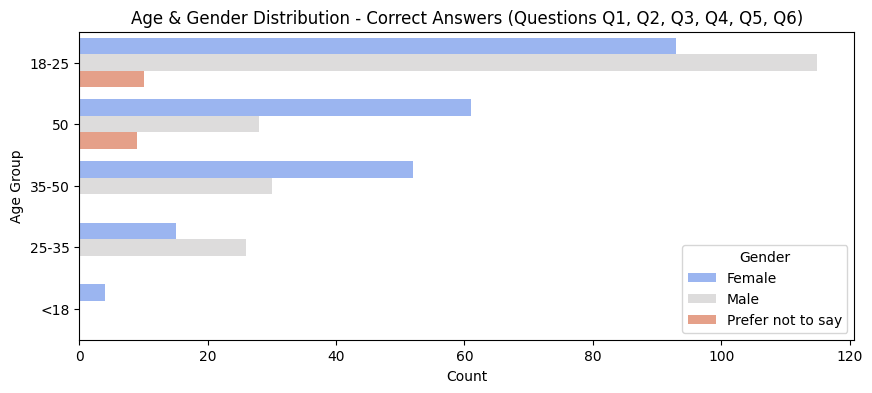

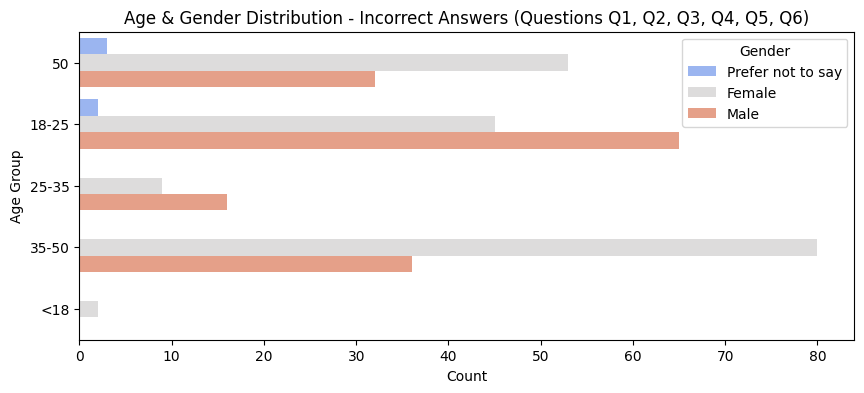

In [26]:
def analyze_multiple_questions(df, question_col_prefixes, age_col="Age", gender_col="Gender"):
    """
    Analyzes multiple questions by visualizing the average percentage of correct responses,
    and demographic distributions for those who got it right vs. wrong.

    Parameters:
    df (DataFrame): The dataset.
    question_col_prefixes (list): List of prefixes of the question columns (e.g., ["Q1", "Q2"]).
    age_col (str): Column name representing age.
    gender_col (str): Column name representing gender.
    """

    total_correct_responses = 0
    total_responses = len(df)
    correct_responses_list = []
    incorrect_responses_list = []

    for question_col_prefix in question_col_prefixes:
        question_index = df.columns.get_loc(question_col_prefix)
        score_col = df.columns[question_index + 1]  # The next column is the score column

        # Extract correct and incorrect responses
        correct_responses = df[df[score_col] == "1.00 / 1"]
        incorrect_responses = df[df[score_col] != "1.00 / 1"]

        heard_of_ai_col = 'Have you heard of AI influencers?'
        heard_of_ai_yes = df[df[heard_of_ai_col] == 'Yes']
        heard_of_ai_no = df[df[heard_of_ai_col] == 'No']

        correct_responses_yes = heard_of_ai_yes[heard_of_ai_yes[score_col] == "1.00 / 1"]
        correct_responses_no = heard_of_ai_no[heard_of_ai_no[score_col] == "1.00 / 1"]

        print(f"Percentage of people who heard of AI influencers and got {question_col_prefix} correct: {(len(correct_responses_yes) / len(heard_of_ai_yes)) * 100:.2f}%")
        print(f"Percentage of people who haven't heard of AI influencers and got {question_col_prefix} correct: {(len(correct_responses_no) / len(heard_of_ai_no)) * 100:.2f}%")

        total_correct_responses += len(correct_responses)
        correct_responses_list.append(correct_responses)
        incorrect_responses_list.append(incorrect_responses)

    # Calculate average percentage of correct responses
    average_correct_percentage = (total_correct_responses / (total_responses * len(question_col_prefixes))) * 100

    # Print the average percentage of people who got the questions correct
    print(f"Average percentage of people who got questions {', '.join(question_col_prefixes)} correct: {average_correct_percentage:.2f}%")

    # Combine correct and incorrect responses for demographic analysis
    combined_correct_responses = pd.concat(correct_responses_list)
    combined_incorrect_responses = pd.concat(incorrect_responses_list)

    # Demographics of correct responses
    plt.figure(figsize=(10, 4))
    sns.countplot(y=combined_correct_responses[age_col], hue=combined_correct_responses[gender_col], palette="coolwarm")
    plt.title(f"Age & Gender Distribution - Correct Answers (Questions {', '.join(question_col_prefixes)})")
    plt.xlabel("Count")
    plt.ylabel("Age Group")
    plt.legend(title="Gender")
    plt.show()

    # Demographics of incorrect responses
    plt.figure(figsize=(10, 4))
    sns.countplot(y=combined_incorrect_responses[age_col], hue=combined_incorrect_responses[gender_col], palette="coolwarm")
    plt.title(f"Age & Gender Distribution - Incorrect Answers (Questions {', '.join(question_col_prefixes)})")
    plt.xlabel("Count")
    plt.ylabel("Age Group")
    plt.legend(title="Gender")
    plt.show()

    return combined_correct_responses[[age_col, gender_col]], combined_incorrect_responses[[age_col, gender_col]]

# Example usage
correct_demo, incorrect_demo = analyze_multiple_questions(df, question_prefixes)

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def analyze_ai_awareness_impact(df, question_cols):
    """
    Analyzes the relationship between AI influencer awareness and quiz performance
    
    Parameters:
    df (DataFrame): Input dataframe
    question_cols (list): List of score column names
    """
    # Convert score columns to numeric values
    for col in question_cols:
        df[col] = df[col].str.split(' / ').str[0].astype(float)
    
    # Calculate average score
    df['Average_Score'] = df[question_cols].mean(axis=1)
    
    # Calculate average scores by AI awareness
    average_scores = df.groupby('Have you heard of AI influencers?')['Average_Score'].agg(['mean', 'count', 'std'])
    
    # Visualization
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x='Have you heard of AI influencers?', y='Average_Score', 
            ci='sd', palette='viridis')
    plt.title('Average Quiz Scores by AI Influencer Awareness')
    plt.xlabel('Awareness of AI Influencers')
    plt.ylabel('Average Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return average_scores

# Example usage
score_columns = ['Q1 [Score]', 'Q2 [Score].1', 'Q3 [Score].2', 
                 'Q4 [Score].3', 'Q5 [Score].4', 'Q6 [Score].5']
results = analyze_ai_awareness_impact(df, score_columns)
print("\nDetailed Statistics:")
print(results)

KeyError: 'Q1 [Score]'